In [45]:
# Import the needed modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### Read Data

In [46]:
teams_df = pd.read_csv('data/highest_earning_teams.csv', sep=',')
players_df = pd.read_csv('data/highest_earning_players.csv', sep=',')
country_df = pd.read_csv('data/country-and-continent-codes-list.csv')

In [47]:
teams_df

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
0,760,San Francisco Shock,3105000.0,7,Overwatch,First-Person Shooter
1,776,London Spitfire,1591136.5,13,Overwatch,First-Person Shooter
2,768,New York Excelsior,1572618.5,18,Overwatch,First-Person Shooter
3,773,Philadelphia Fusion,1186278.5,15,Overwatch,First-Person Shooter
4,766,Seoul Dynasty,1130000.0,6,Overwatch,First-Person Shooter
...,...,...,...,...,...,...
923,24781,Rex Regum Qeon,6286.8,2,Arena of Valor,Multiplayer Online Battle Arena
924,261,Alliance,4000.0,1,Arena of Valor,Multiplayer Online Battle Arena
925,713,Marines Esports,3429.6,1,Arena of Valor,Multiplayer Online Battle Arena
926,608,British National Team,2500.0,1,Arena of Valor,Multiplayer Online Battle Arena


The data includes 10 games and we can classify them according to the 5 genres.

In [50]:
#Show all the unique game and genre included in the dataset
teams_df.groupby('Genre')['Game'].unique().to_frame().reset_index()
players_df.groupby('Genre')['Game'].unique().to_frame().reset_index()
teams_df.groupby('Genre').count()['Game'],players_df.groupby('Genre').count()['Game']

(Genre
 Battle Royale                      200
 Collectible Card Game               80
 First-Person Shooter               200
 Multiplayer Online Battle Arena    348
 Strategy                           100
 Name: Game, dtype: int64,
 Genre
 Battle Royale                      200
 Collectible Card Game              100
 First-Person Shooter               200
 Multiplayer Online Battle Arena    400
 Strategy                           100
 Name: Game, dtype: int64)

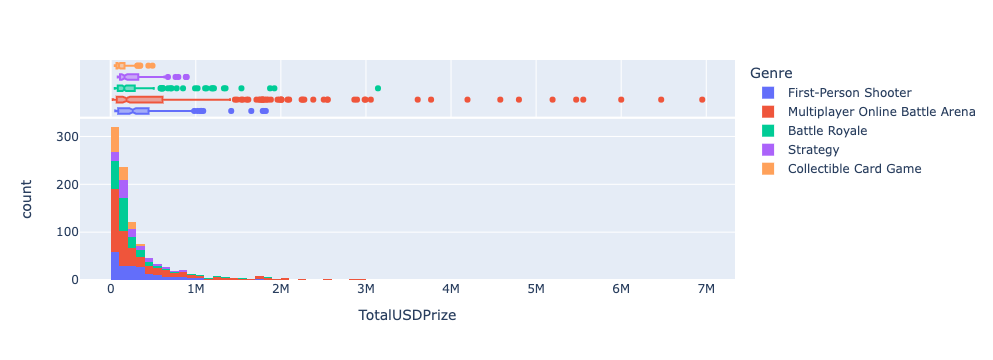

In [102]:
fig = px.histogram(players_df, x="TotalUSDPrize",color="Genre",
                   marginal="box", # or violin, rug
                   hover_data=players_df.columns)
fig.show()

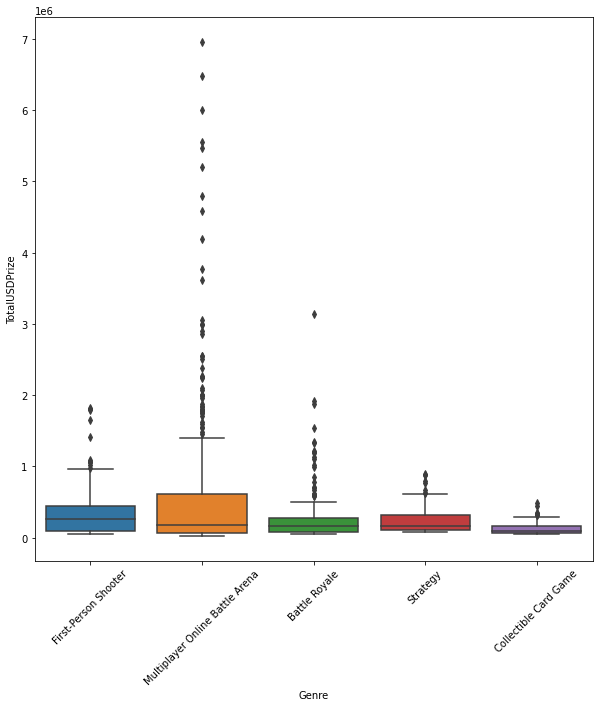

In [103]:
fig, ax = plt.subplots(figsize=(10,10))
plt.xticks(rotation = 45)
sns.boxplot(data = players_df, x="Genre", y="TotalUSDPrize")
plt.show()

There are lots of  'outliers' in the data and the top of the top players competing in MOBA do outearn all the other genres.

In [13]:
teams_df[['TeamName','Game']].groupby('TeamName').count().reset_index()

,TeamName,Game
0,(monkey) Business,1
1,100 Thieves,3
2,303 Esports,1
3,3DMAX,2
4,4 Clovers & Lepricon,1
...,...,...
500,mudgolems,1
501,paiN Gaming,3
502,vsBANDITS,1
503,wisdom Nerve victory,1


A team can appear more than once but note that it is a different game.

### Part1 Explore Teams Data

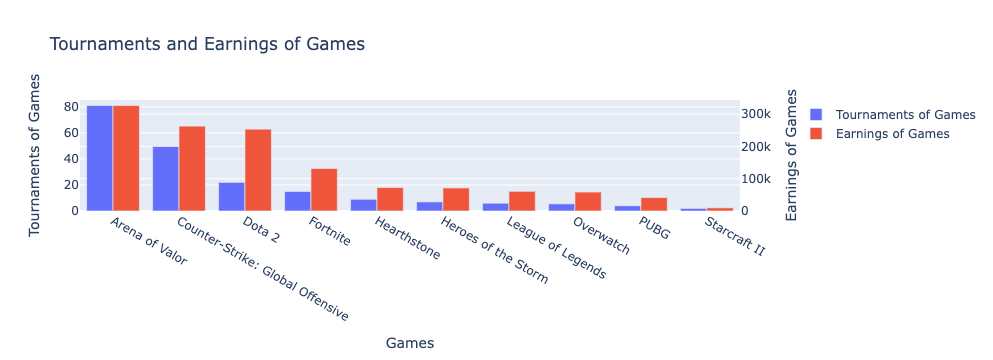

In [81]:
#Show all the different games and prize money sums in the dataset
popularity_game = pd.DataFrame(teams_df.groupby('Game')['TotalTournaments'].sum().reset_index())
earnings_game = pd.DataFrame(teams_df.groupby('Game')['TotalUSDPrize'].sum().reset_index())


# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Bar(x=popularity_game['Game'].tolist(), y=popularity_per_game['TotalTournaments'].tolist(), name="Tournaments of Games",
    offsetgroup=0),
    secondary_y=False
)

fig.add_trace(
    go.Bar(x=earnings_game['Game'].tolist(), y=earnings_per_game['TotalUSDPrize'].tolist(), name="Earnings of Games",
    offsetgroup=1),
    secondary_y=True
)

# Add figure title
fig.update_layout(
    title_text="Tournaments and Earnings of Games"
)


# Set x-axis title
fig.update_xaxes(title_text="Games")

# Set y-axes titles
fig.update_yaxes(title_text="Tournaments of Games", secondary_y=False)
fig.update_yaxes(title_text="Earnings of Games", secondary_y=True)

fig.show()

From this we can see that actually Starcraft II has the lion share of tournaments, followed by CSGO, Dota 2 and League of Legends. In fact, Starcraft 2 has more than 2X as much tournaments as CSGO. However, this is likely due to how long the game has been released (2010)

In [86]:
# median Tournaments by game
teams_df.groupby('Game')['TotalTournaments'].median().sort_values(ascending = False)

Game
Starcraft II                        81.0
Counter-Strike: Global Offensive    49.5
League of Legends                   22.0
Dota 2                              15.0
Heroes of the Storm                  9.0
PUBG                                 7.0
Overwatch                            6.0
Fortnite                             5.5
Hearthstone                          4.0
Arena of Valor                       2.0
Name: TotalTournaments, dtype: float64

In [93]:
# sum USDprize by game
teams_df.groupby('Game')['TotalUSDPrize'].sum().sort_values(ascending = False)

Game
Dota 2                              2.202828e+08
Counter-Strike: Global Offensive    8.485393e+07
League of Legends                   6.466556e+07
Fortnite                            3.466133e+07
Starcraft II                        2.785615e+07
Overwatch                           2.046527e+07
PUBG                                1.671500e+07
Hearthstone                         1.086453e+07
Heroes of the Storm                 1.071052e+07
Arena of Valor                      9.969149e+06
Name: TotalUSDPrize, dtype: float64

In [85]:
# median USDprize by game
teams_df.groupby('Game')['TotalUSDPrize'].median().sort_values(ascending = False)

Game
Counter-Strike: Global Offensive    326472.645
League of Legends                   262743.475
Dota 2                              253425.200
Starcraft II                        131583.605
Overwatch                            72472.210
PUBG                                 71411.350
Fortnite                             60919.875
Arena of Valor                       58750.000
Heroes of the Storm                  41687.500
Hearthstone                           9859.875
Name: TotalUSDPrize, dtype: float64

In [89]:
# sum USDPrize by Genre
teams_df.groupby('Genre')['TotalUSDPrize'].sum('TotalUSDPrize').sort_values(ascending=False)

Genre
Multiplayer Online Battle Arena    3.056280e+08
First-Person Shooter               1.053192e+08
Battle Royale                      5.137633e+07
Strategy                           2.785615e+07
Collectible Card Game              1.086453e+07
Name: TotalUSDPrize, dtype: float64

In [90]:
#Show the average amount of prize money the team have won based on Genre
# median USDPrize by Genre
teams_df.groupby('Genre')['TotalUSDPrize'].median('TotalUSDPrize').sort_values(ascending=False)

Genre
Multiplayer Online Battle Arena    165896.250
First-Person Shooter               143829.405
Strategy                           131583.605
Battle Royale                       66771.915
Collectible Card Game                9859.875
Name: TotalUSDPrize, dtype: float64

Based of the various groupby tables, we have
While it's true that MOBO brings in the highest total USD Prize won and average earnings, the median earnings for individual FPS players are highest. In addition, it should be mentioned that MOBA games has the highest number of competitors within the dataset. This could signify 1 of 2 things.

1) The dataset is not representative of other generes

2) MOBA is indeed the most popular and thus could explain the higher amount of money earned by pros since there would be more viewership

### Part2 Explore players Data

In [18]:
players_df

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
0,3883,Peter,Rasmussen,dupreeh,dk,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter
1,3679,Andreas,Højsleth,Xyp9x,dk,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter
2,3885,Nicolai,Reedtz,dev1ce,dk,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter
3,3672,Lukas,Rossander,gla1ve,dk,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter
4,17800,Emil,Reif,Magisk,dk,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter
...,...,...,...,...,...,...,...,...
995,7400,Janne,Mikkonen,Savjz,fi,50734.44,Hearthstone,Collectible Card Game
996,3255,Drew,Biessener,Tidesoftime,us,50449.60,Hearthstone,Collectible Card Game
997,49164,Simone,Liguori,Leta,it,49300.00,Hearthstone,Collectible Card Game
998,43043,Mike,Eichner,Ike,us,48550.00,Hearthstone,Collectible Card Game


In [29]:
#Show the number of players for each game in the dataset
players_df['Game'].value_counts()

Counter-Strike: Global Offensive    100
Dota 2                              100
League of Legends                   100
Fortnite                            100
Overwatch                           100
Starcraft II                        100
Heroes of the Storm                 100
PUBG                                100
Arena of Valor                      100
Hearthstone                         100
Name: Game, dtype: int64

In [30]:
#join the country information and players information
country_df = country_df.rename(columns={'Two_Letter_Country_Code':'CountryCode'})
players_df['CountryCode'] = players_df['CountryCode'].apply(lambda x: x.upper())
players_new = pd.merge(players_df, country_df, how='left', on='CountryCode')

In [31]:
#country name cleaning
def name_cleaning(country):
    country = country.split(',')
    return country[0]
players_new['Country_Name'] = players_new['Country_Name'].apply(name_cleaning)
players_new['Country_Name'].unique()
players_new

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre,Continent_Name,Continent_Code,Country_Name,Three_Letter_Country_Code,Country_Number
0,3883,Peter,Rasmussen,dupreeh,DK,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter,Europe,EU,Denmark,DNK,208.0
1,3679,Andreas,Højsleth,Xyp9x,DK,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter,Europe,EU,Denmark,DNK,208.0
2,3885,Nicolai,Reedtz,dev1ce,DK,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter,Europe,EU,Denmark,DNK,208.0
3,3672,Lukas,Rossander,gla1ve,DK,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter,Europe,EU,Denmark,DNK,208.0
4,17800,Emil,Reif,Magisk,DK,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter,Europe,EU,Denmark,DNK,208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,7400,Janne,Mikkonen,Savjz,FI,50734.44,Hearthstone,Collectible Card Game,Europe,EU,Finland,FIN,246.0
1028,3255,Drew,Biessener,Tidesoftime,US,50449.60,Hearthstone,Collectible Card Game,North America,NaN,United States of America,USA,840.0
1029,49164,Simone,Liguori,Leta,IT,49300.00,Hearthstone,Collectible Card Game,Europe,EU,Italy,ITA,380.0
1030,43043,Mike,Eichner,Ike,US,48550.00,Hearthstone,Collectible Card Game,North America,NaN,United States of America,USA,840.0


In [78]:
# It could be interesting to find out which countries have the most esports players.
players_per_country = players_new['Country_Name'].value_counts()

#Select the top 10 countries with most players in the dataset
top10 = players_per_country.nlargest(10)
top10

Korea                       251
China                       168
United States of America    114
Sweden                       45
Russian Federation           44
Canada                       37
France                       37
Denmark                      36
Taiwan                       34
Germany                      30
Name: Country_Name, dtype: int64

In [79]:
#Show the best earning player for every game in the dataset
players_new.groupby('Game').head(1)[['Game', 'CurrentHandle', 'Country_Name', 'Continent_Name']]

,Game,CurrentHandle,Country_Name,Continent_Name
0,Counter-Strike: Global Offensive,dupreeh,Denmark,Europe
112,Dota 2,N0tail,Denmark,Europe
216,League of Legends,Faker,Korea,Asia
316,Fortnite,Bugha,United States of America,North America
419,Overwatch,Rascal,Korea,Asia
520,Starcraft II,Serral,Finland,Europe
620,Heroes of the Storm,KyoCha,Korea,Asia
720,PUBG,Loki,Korea,Asia
827,Arena of Valor,Cat,China,Asia
927,Hearthstone,Thijs,Netherlands,Europe


In [95]:
# sum USDPrize by Genre
players_new[['Genre', 'TotalUSDPrize']].groupby('Genre').sum().sort_values(by='TotalUSDPrize',ascending=False).reset_index() #median earnings

,Genre,TotalUSDPrize
0,Multiplayer Online Battle Arena,2.409416e+08
1,First-Person Shooter,7.325530e+07
2,Battle Royale,5.727101e+07
3,Strategy,2.537982e+07
4,Collectible Card Game,1.420638e+07


In [98]:
# median USDPrize by Genre
players_new[['Genre', 'TotalUSDPrize']].groupby('Genre').median().sort_values(by='TotalUSDPrize',ascending=False).reset_index() #median earnings

,Genre,TotalUSDPrize
0,First-Person Shooter,269446.780
1,Multiplayer Online Battle Arena,186745.650
2,Strategy,162767.105
3,Battle Royale,158755.420
4,Collectible Card Game,97593.920


In [99]:
# sum USDPrize by Game
players_new[['Game', 'TotalUSDPrize']].groupby('Game').sum().sort_values(by='TotalUSDPrize',ascending=False).reset_index() #median earnings

,Game,TotalUSDPrize
0,Dota 2,1.857838e+08
1,Counter-Strike: Global Offensive,6.084354e+07
2,Fortnite,4.396542e+07
3,League of Legends,3.504348e+07
4,Starcraft II,2.537982e+07
5,Hearthstone,1.420638e+07
6,PUBG,1.330559e+07
7,Overwatch,1.241176e+07
8,Heroes of the Storm,1.178045e+07
9,Arena of Valor,8.333952e+06


In [100]:
# median USDPrize by Game
players_new[['Game', 'TotalUSDPrize']].groupby('Game').median().sort_values(by='TotalUSDPrize',ascending=False).reset_index() #median earnings

,Game,TotalUSDPrize
0,Dota 2,1367572.050
1,Counter-Strike: Global Offensive,414305.650
2,League of Legends,281803.335
3,Fortnite,229464.980
4,Starcraft II,162767.105
5,Hearthstone,97593.920
6,Heroes of the Storm,89372.070
7,Overwatch,88443.760
8,PUBG,85032.940
9,Arena of Valor,58160.230


In [ ]:
#TODO: player world map

### Part3 Esports in Country and Continent

In [68]:
players_new.groupby('Country_Name')['TotalUSDPrize'].sum().sort_values(ascending=False).to_frame().reset_index().head(10)

,Country_Name,TotalUSDPrize
0,China,72391878.56
1,Korea,58441733.71
2,United States of America,43099381.78
3,Denmark,26840800.02
4,Russian Federation,21645785.42
5,Sweden,20770423.01
6,Finland,18876262.25
7,France,15803240.18
8,Canada,13483648.61
9,Germany,10143181.56


In [77]:
players_new.groupby('Country_Name')['TotalUSDPrize'].median().sort_values(ascending=False).to_frame().reset_index().head(10)

,Country_Name,TotalUSDPrize
0,Lebanon,4193412.690
1,Pakistan,3608317.340
2,Jordan,3165871.175
3,Estonia,1685007.455
4,Singapore,1553261.960
5,Macao,1337308.370
6,Romania,1239837.570
7,Israel,1232344.365
8,Macedonia,1046689.750
9,Malaysia,902489.365


In [70]:
players_new.groupby('Continent_Name')['TotalUSDPrize'].sum().sort_values(ascending=False).to_frame().reset_index()

,Continent_Name,TotalUSDPrize
0,Asia,1.827135e+08
1,Europe,1.563520e+08
2,North America,5.703727e+07
3,Oceania,7.999675e+06
4,South America,6.951711e+06


In [76]:
players_new.groupby('Continent_Name')['TotalUSDPrize'].median().sort_values(ascending=False).to_frame().reset_index()

,Continent_Name,TotalUSDPrize
0,South America,382208.97
1,Europe,245208.72
2,North America,159833.35
3,Asia,141800.69
4,Oceania,79049.82


Country and Continent
Interestingly, it seems that China has the most amount of ESports earnings. If we look at Continent, Asia and Europe largely dominates in terms of total USD earned. However, if we look at it from other dimension. Countries like Lebonon and Parkistan take the cake.

I have a few hypothesis for this.

1) Countries like China and Korea probably have a way higher population that are into ESports, thus resulting in higher total earnings

2) Countries like Parkistan and other less developed countries probably aren't as accepting of ESports culture, so you would have to be really good to get into it, which explains higher median and average earnings

**Some of the lower player count country has "elite" players while popular countries have sheer numbers**